# 1. Descripción del caso de negocio

El progresivo y creciente aumento de la demanda de aplicaciones para la reserva de hospedaje se ha vuelto actualmente, un denominador común. Toda aquella persona que se encuentre interesada, ya sea en alquilar u ofrecer su propiedad para alquiler, coincide en la seguridad y facilidades que ofrecen este tipo de servicios.

Trabajamos para solucionar las inquietudes de un grupo inversor que vió en el negocio de Airbnb un nicho de mercado. Este grupo, tiene como objetivo desarrollar su negocio en los Estados Unidos (USA) - New York, motivo por el cual quiere conocer cómo se desarrolla el mercado inmobiliario en esta zona, para así conocer como capitalizar mejor sus inversiones y poder predecir el precio de alquiler para los alojamientos que tengan disponibles, de acuerdo a sus características y oferta del sector.

Realizaremos un análisis exploratorio de datos para conocer cómo se distribuyen los precios promedios de alquiler en los distintos vecindarios de New York, buscando conocer cuáles son los vecindarios con mayor oferta de alojamientos, cuáles son los rangos de precios que se ofrecen y que relación tienen sus condiciones de servicio, la valoración de los usuarios, el año de construcción de la propiedad y si existe alguna incidencia en el costo del alquiler de dichas propiedades, para finalmente predecir los precios de aquellos alojamientos que se tengan disponibles para incluir en la plataforma. 


# 2. Objetivos

1. Analizar la distribución de los precios de alquileres según los distintos distritos de New York.

1. Analizar tendencias de cada una de las variables para saber su influencia en el precio.

1. Encontrar patrones entre las distintos características de los alojamientos en New York.

1. Modelar un algoritmo de predicción de los precios de alquiler en New York.

1. Brindar recomendaciones al grupo inversor.

# 3. Recolección de la información. 



### Importamos las librerías con las que vamos a trabajar en el análisis.
Fuente de datos: Kaggle.com

In [1]:
#Data science
import numpy as np     #Numerical processing
import pandas as pd    #Data Analysis
import seaborn as sns  #Visualization
import matplotlib as mpl
import matplotlib.pyplot as plt

%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['figure.figsize'] = (20,10)
plt.style.use('ggplot')
mpl.rcParams['agg.path.chunksize'] = 1000

import warnings
warnings.filterwarnings("ignore")

# Regression models
from sklearn.preprocessing import StandardScaler # for feature scaling
from sklearn.pipeline import Pipeline # for using pipeline
from sklearn.linear_model import LinearRegression # for linear regression
from sklearn.preprocessing import PolynomialFeatures # for adding polynomial features
from sklearn.linear_model import Ridge # for ridge regression
from sklearn.linear_model import Lasso # for lasso regression
from sklearn.svm import SVR # for support vector regression
from sklearn.tree import DecisionTreeRegressor # for decisiton tree regression
from sklearn.ensemble import RandomForestRegressor # for random forest regression
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.metrics import pairwise_distances_argmin_min
!pip install pyod -q  
from pyod.models.knn import KNN

# hyptertuning
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint

# extra
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from collections import Counter
from IPython.core.display import display, HTML
sns.set_style('darkgrid')


### Hacemos el cargue de los datos

In [2]:
#from google.colab import drive
#import os
#drive.mount('/content/gdrive')

#df= pd.read_csv('/content/gdrive/My Drive/DataScience_Datasets/Desafio_4/Airbnb.csv')

In [3]:
df = pd.read_csv('Airbnb.csv')
df.head()

id                                              NAME      host id  \
0  1001254                Clean & quiet apt home by the park  80014485718   
1  1002102                             Skylit Midtown Castle  52335172823   
2  1002403               THE VILLAGE OF HARLEM....NEW YORK !  78829239556   
3  1002755                                               NaN  85098326012   
4  1003689  Entire Apt: Spacious Studio/Loft by central park  92037596077   

  host_identity_verified host name neighbourhood group neighbourhood  \
0            unconfirmed  Madaline            Brooklyn    Kensington   
1               verified     Jenna           Manhattan       Midtown   
2                    NaN     Elise           Manhattan        Harlem   
3            unconfirmed     Garry            Brooklyn  Clinton Hill   
4               verified    Lyndon           Manhattan   East Harlem   

        lat      long        country  ... service fee minimum nights  \
0  40.64749 -73.97237  United States  ...       $193            10.0   
1  40.75362 -73.98377  United States  ...        $28            30.0   
2  40.80902 -73.94190  United States  ...       $124             3.0   
3  40.68514 -73.95976  United States  ...        $74            30.0   
4  40.79851 -73.94399  United States  ...        $41            10.0   

  number of reviews last review  reviews per month review rate number  \
0               9.0  10/19/2021               0.21                4.0   
1              45.0   5/21/2022               0.38                4.0   
2               0.0         NaN                NaN                5.0   
3             270.0    7/5/2019               4.64                4.0   
4               9.0  11/19/2018               0.10                3.0   

  calculated host listings count  availability 365  \
0                            6.0             286.0   
1                            2.0             228.0   
2                            1.0             352.0   
3                            1.0             322.0   
4                            1.0             289.0   

                                         house_rules license  
0  Clean up and treat the home the way you'd like...     NaN  
1  Pet friendly but please confirm with me if the...     NaN  
2  I encourage you to use my kitchen, cooking and...     NaN  
3                                                NaN     NaN  
4  Please no smoking in the house, porch or on th...     NaN  

[5 rows x 26 columns]

# 4. Preparación de los datos.

In [4]:
df.count()

id                                102599
NAME                              102349
host id                           102599
host_identity_verified            102310
host name                         102193
neighbourhood group               102570
neighbourhood                     102583
lat                               102591
long                              102591
country                           102067
country code                      102468
instant_bookable                  102494
cancellation_policy               102523
room type                         102599
Construction year                 102385
price                             102352
service fee                       102326
minimum nights                    102190
number of reviews                 102416
last review                        86706
reviews per month                  86720
review rate number                102273
calculated host listings count    102280
availability 365                  102151
house_rules     

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              102599 non-null  int64  
 1   NAME                            102349 non-null  object 
 2   host id                         102599 non-null  int64  
 3   host_identity_verified          102310 non-null  object 
 4   host name                       102193 non-null  object 
 5   neighbourhood group             102570 non-null  object 
 6   neighbourhood                   102583 non-null  object 
 7   lat                             102591 non-null  float64
 8   long                            102591 non-null  float64
 9   country                         102067 non-null  object 
 10  country code                    102468 non-null  object 
 11  instant_bookable                102494 non-null  object 
 12  cancellation_pol

In [6]:
#Eliminamos las columnas que no utilizaremos en el análisis, como es el caso de: country y country_code, ya que sabemos que el análisis es para New York, por tanto el país es Estados Unidos.
#Las columnas id, name_host, NAME, calculated host listings count, availability 365, last review  dado que no aportan al análisis.

df = df.drop(['id','NAME','host name', 'country', 'country code', 'calculated host listings count', 'availability 365', 'last review', 'house_rules', 'license'], axis=1)
df.head()

host id host_identity_verified neighbourhood group neighbourhood  \
0  80014485718            unconfirmed            Brooklyn    Kensington   
1  52335172823               verified           Manhattan       Midtown   
2  78829239556                    NaN           Manhattan        Harlem   
3  85098326012            unconfirmed            Brooklyn  Clinton Hill   
4  92037596077               verified           Manhattan   East Harlem   

        lat      long instant_bookable cancellation_policy        room type  \
0  40.64749 -73.97237            False              strict     Private room   
1  40.75362 -73.98377            False            moderate  Entire home/apt   
2  40.80902 -73.94190             True            flexible     Private room   
3  40.68514 -73.95976             True            moderate  Entire home/apt   
4  40.79851 -73.94399            False            moderate  Entire home/apt   

   Construction year  price service fee  minimum nights  number of reviews  \
0             2020.0  $966        $193             10.0                9.0   
1             2007.0  $142         $28             30.0               45.0   
2             2005.0  $620        $124              3.0                0.0   
3             2005.0  $368         $74             30.0              270.0   
4             2009.0  $204         $41             10.0                9.0   

   reviews per month  review rate number  
0               0.21                 4.0  
1               0.38                 4.0  
2                NaN                 5.0  
3               4.64                 4.0  
4               0.10                 3.0

In [7]:
#Modificación de los tipos de datos para las variables: price y service fee.
df['price'] = df['price'].astype(str).map(lambda x: x.replace('$',''))
df['price'] = pd.to_numeric(df['price'],errors = 'coerce')
df['service fee'] = df['service fee'].astype(str).map(lambda x: x.replace('$','')).astype(float, errors = 'raise')


In [8]:
#Validamos el cambio en el tipo de dato para las variables: price y service fee.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 16 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   host id                 102599 non-null  int64  
 1   host_identity_verified  102310 non-null  object 
 2   neighbourhood group     102570 non-null  object 
 3   neighbourhood           102583 non-null  object 
 4   lat                     102591 non-null  float64
 5   long                    102591 non-null  float64
 6   instant_bookable        102494 non-null  object 
 7   cancellation_policy     102523 non-null  object 
 8   room type               102599 non-null  object 
 9   Construction year       102385 non-null  float64
 10  price                   84449 non-null   float64
 11  service fee             102326 non-null  float64
 12  minimum nights          102190 non-null  float64
 13  number of reviews       102416 non-null  float64
 14  reviews per month   

In [9]:
#Para poder trabajar más fácilmente con el dataframe, renombramos algunas columnas

df = df.rename(columns={'host id': 'id_host','neighbourhood group': 'neighbourhood_group','minimum nights':'min_nights', 'service fee': 'service_fee', 'Construction year': 'construction_year','room type':'room_type', 'number of reviews': 'number_reviews', 'reviews per month': 'reviews_month', 'review rate number': 'review_rate_number'})
df.head()


id_host host_identity_verified neighbourhood_group neighbourhood  \
0  80014485718            unconfirmed            Brooklyn    Kensington   
1  52335172823               verified           Manhattan       Midtown   
2  78829239556                    NaN           Manhattan        Harlem   
3  85098326012            unconfirmed            Brooklyn  Clinton Hill   
4  92037596077               verified           Manhattan   East Harlem   

        lat      long instant_bookable cancellation_policy        room_type  \
0  40.64749 -73.97237            False              strict     Private room   
1  40.75362 -73.98377            False            moderate  Entire home/apt   
2  40.80902 -73.94190             True            flexible     Private room   
3  40.68514 -73.95976             True            moderate  Entire home/apt   
4  40.79851 -73.94399            False            moderate  Entire home/apt   

   construction_year  price  service_fee  min_nights  number_reviews  \
0             2020.0  966.0        193.0        10.0             9.0   
1             2007.0  142.0         28.0        30.0            45.0   
2             2005.0  620.0        124.0         3.0             0.0   
3             2005.0  368.0         74.0        30.0           270.0   
4             2009.0  204.0         41.0        10.0             9.0   

   reviews_month  review_rate_number  
0           0.21                 4.0  
1           0.38                 4.0  
2            NaN                 5.0  
3           4.64                 4.0  
4           0.10                 3.0

In [10]:
#Validamos la modificación del nombre de las columnas para facilitar el análisis.
df.columns

Index(['id_host', 'host_identity_verified', 'neighbourhood_group',
       'neighbourhood', 'lat', 'long', 'instant_bookable',
       'cancellation_policy', 'room_type', 'construction_year', 'price',
       'service_fee', 'min_nights', 'number_reviews', 'reviews_month',
       'review_rate_number'],
      dtype='object')

In [11]:
df.index

RangeIndex(start=0, stop=102599, step=1)

In [12]:
df.shape

(102599, 16)

In [13]:
# Función para extraer las columnas categóricas y las columnas numéricas en una lista separada para facilitar el EDA.
def get_num_cat_cols(df):
    
    num_cls = [x for x in df.columns if df[x].dtype != 'object']
    cat_cls = [x for x in df.columns if x not in num_cls]

    print(f'Numerical columns \n',num_cls)
    print(f'Categorical columns \n',cat_cls)
    
    return num_cls, cat_cls

In [14]:
num_cols, cat_cols = get_num_cat_cols(df)

Numerical columns 
 ['id_host', 'lat', 'long', 'construction_year', 'price', 'service_fee', 'min_nights', 'number_reviews', 'reviews_month', 'review_rate_number']
Categorical columns 
 ['host_identity_verified', 'neighbourhood_group', 'neighbourhood', 'instant_bookable', 'cancellation_policy', 'room_type']


In [15]:
#Análisis descriptivo de las features.
df[num_cols].describe()

id_host            lat           long  construction_year  \
count  1.025990e+05  102591.000000  102591.000000      102385.000000   
mean   4.925411e+10      40.728094     -73.949644        2012.487464   
std    2.853900e+10       0.055857       0.049521           5.765556   
min    1.236005e+08      40.499790     -74.249840        2003.000000   
25%    2.458333e+10      40.688740     -73.982580        2007.000000   
50%    4.911774e+10      40.722290     -73.954440        2012.000000   
75%    7.399650e+10      40.762760     -73.932350        2017.000000   
max    9.876313e+10      40.916970     -73.705220        2022.000000   

              price    service_fee     min_nights  number_reviews  \
count  84449.000000  102326.000000  102190.000000   102416.000000   
mean     524.702448     125.026924       8.135845       27.483743   
std      273.436409      66.325739      30.553781       49.508954   
min       50.000000      10.000000   -1223.000000        0.000000   
25%      288.000000      68.000000       2.000000        1.000000   
50%      524.000000     125.000000       3.000000        7.000000   
75%      759.000000     183.000000       5.000000       30.000000   
max      999.000000     240.000000    5645.000000     1024.000000   

       reviews_month  review_rate_number  
count   86720.000000       102273.000000  
mean        1.374022            3.279106  
std         1.746621            1.284657  
min         0.010000            1.000000  
25%         0.220000            2.000000  
50%         0.740000            3.000000  
75%         2.000000            4.000000  
max        90.000000            5.000000

Entre los insights que tenemos de este análisis descriptivo, encontramos que el precio mínimo es de 50 USD y el precio máximo de 999 USD, con un valor promedio de alojamiento de 525 USD, importante resaltar que al analizar todos los datos, se tienen precios de habitación privada, habitación compartida, alojamiento entero y habitación de hotel. Por lo cuál, lo más conveniente es realizar el análisis por tipo de alojamiento, para observar si existen diferencias de acuerdo a las características de cada uno de ellos. 

Así mismo, observamos que se tienen datos para la variable mínimo de noches con valores negativos, por tanto estos deben ser reemplazados por 0, también se muestra un valor máximo de noches de 5645 noches lo que equivale a 15 años, por tanto se ajustará los valores de esta variable mayores a 365 por el equivalente a un año, es decir, por 365 noches mínimas. Con el fin de limitar nuestro análisis a un número mínimo de noches de un año. 

In [16]:
n_negativos = sum(df['min_nights'] < 0)

# Reemplazamos los valores negativos con cero
df['min_nights'] = np.clip(df['min_nights'], a_min=0, a_max=None)

#Reemplazamos aquellos valores mayores a 365 noches por 365, limitando el alcance a un año de alquiler mínimo requerido.
df['min_nights'] = np.where(df['min_nights'] > 365, 365, df['min_nights'])

#Validamos los cambios
df['min_nights'].describe()

count    102190.000000
mean          7.977835
std          18.283491
min           0.000000
25%           2.000000
50%           3.000000
75%           5.000000
max         365.000000
Name: min_nights, dtype: float64

In [17]:
df['neighbourhood_group'].value_counts()

Manhattan        43792
Brooklyn         41842
Queens           13267
Bronx             2712
Staten Island      955
brookln              1
manhatan             1
Name: neighbourhood_group, dtype: int64

In [18]:
#Se unifican valores de algunos distritos que se encuentran escritos de una manera diferente.
df = df.replace({"manhatan": 'Manhattan'})
df = df.replace({"brookin": 'Brooklyn'})
df = df.replace({"brookln": 'Brooklyn'})

In [19]:
#Validamos el cambio en las clases.
df['neighbourhood_group'].value_counts()

Manhattan        43793
Brooklyn         41843
Queens           13267
Bronx             2712
Staten Island      955
Name: neighbourhood_group, dtype: int64

### Tratamiento de datos nulos

In [20]:
#Verificación de datos nulos
df.isnull().sum()

id_host                       0
host_identity_verified      289
neighbourhood_group          29
neighbourhood                16
lat                           8
long                          8
instant_bookable            105
cancellation_policy          76
room_type                     0
construction_year           214
price                     18150
service_fee                 273
min_nights                  409
number_reviews              183
reviews_month             15879
review_rate_number          326
dtype: int64

<AxesSubplot:>

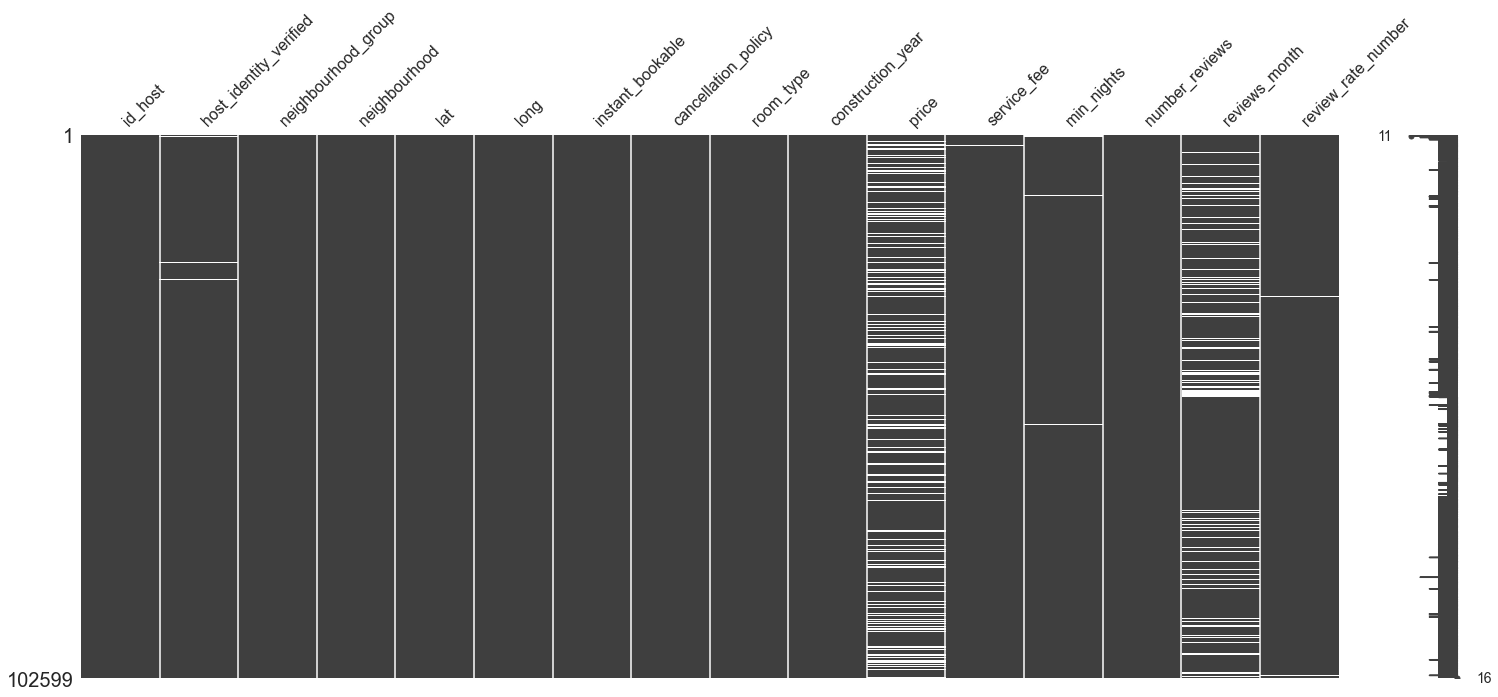

In [21]:
import missingno as msno
import matplotlib
msno.matrix(df)

In [22]:
#Realizamos el reemplazo de los NaN en las siguientes features de forma aleatoria.

import random
random_price = df.loc[df['price'] == 'NaN', 'price'] = df['price'].apply(lambda x: random.randint(50, 999)) 
random_service_fee = df.loc[df['service_fee'] == 'NaN', 'service_fee'] = df['service_fee'].apply(lambda x: random.randint(10, 240))
random_review_rate_number = df.loc[df['review_rate_number'] == 'NaN', 'review_rate_number'] = df['review_rate_number'].apply(lambda x: random.randint(1, 5)) 
random_number_reviews = df.loc[df['number_reviews'] == 'NaN', 'number_reviews'] = df['number_reviews'].apply(lambda x: random.randint(0, 1024)) 

df['price'] = df['price'].fillna(random_price)
df['service_fee'] = df['service_fee'].fillna(random_service_fee)
df['review_rate_number'] = df['review_rate_number'].fillna(random_review_rate_number)
df['number_reviews'] = df['number_reviews'].fillna(random_number_reviews)


In [23]:
random_lat = df.loc[df['lat'] == 'NaN', 'lat'] = df['lat'].apply(lambda x: random.uniform(40.499790, 40.916970)) 
random_long = df.loc[df['long'] == 'NaN', 'long'] = df['long'].apply(lambda x: random.uniform(-73.949644, -73.705220))

df['lat'] = df['lat'].fillna(random_lat)
df['long'] = df['long'].fillna(random_long)

Elegimos trabajar con un número aleatorio teniendo en cuenta un rango de datos entre el valor mínimo y el valor máximo para cada una de las features que tienen datos nulos (NaN), esto con el fin de que los datos mantengan una distribución normal. 


In [24]:
#Convertimos la variable construction_year en entero, pero para aplicar la función lambda, se deben completar los valores faltantes.
df['construction_year'] = df['construction_year'].fillna('2012.0')  #reemplazar nan por 2012 que es el año promedio.
df['construction_year'] = df['construction_year'].astype(str).apply(lambda x: x.split('.')[0]).astype(int)

In [25]:
#Validamos el cambio realizado en la variable construction_year a int.
df['construction_year'].unique()

array([2020, 2007, 2005, 2009, 2013, 2015, 2004, 2008, 2010, 2019, 2018,
       2006, 2016, 2017, 2021, 2003, 2011, 2012, 2022, 2014])

In [26]:
#Convertimos la variable min_nights en entero, pero para aplicar la función lambda, se deben completar los valores faltantes.
df['min_nights'] = df['min_nights'].fillna('8') #reemplazar nan por el valor mínimo (8).


In [27]:
#Cambiamos el tipo de dato de float a int.
df['min_nights'] = pd.to_numeric(df['min_nights'], errors='coerce').apply(lambda x: int(round(x)))


In [28]:
#Validamos los valores para la columna instant_bookable, eligiendo False para aquellos que no se tiene información.
df['instant_bookable'].unique()

array([False, True, nan], dtype=object)

In [29]:
#Validamos los valores para la columna cancellation_policy, eligiendo strict para aquellos que no se tiene información.
df['cancellation_policy'].unique()

array(['strict', 'moderate', 'flexible', nan], dtype=object)

In [30]:
#Se realiza el siguiente tratamiento para los datos, completando las instancias que tienen datos nulos:

df['neighbourhood'] = df['neighbourhood'].fillna('undefined') #reemplazar nan por undefined, dado que estamos haciendo el análisis por distrito (neighbourhood_group).
df['host_identity_verified'] = df['host_identity_verified'].fillna('unconfirmed') #reemplazar nan por unconfirmed.
df['instant_bookable'] = df['instant_bookable'].fillna(False) #reemplazar nan por False.
df['cancellation_policy'] = df['cancellation_policy'].fillna('strict') #reemplazar nan por strict.
df['min_nights'] = df['min_nights'].fillna('8') #reemplazar nan por el valor mínimo (8).
df['reviews_month'] = df['reviews_month'].fillna('1.374') #reemplazar nan por el valor promedio (1.374).

df.head()

id_host host_identity_verified neighbourhood_group neighbourhood  \
0  80014485718            unconfirmed            Brooklyn    Kensington   
1  52335172823               verified           Manhattan       Midtown   
2  78829239556            unconfirmed           Manhattan        Harlem   
3  85098326012            unconfirmed            Brooklyn  Clinton Hill   
4  92037596077               verified           Manhattan   East Harlem   

        lat      long  instant_bookable cancellation_policy        room_type  \
0  40.64749 -73.97237             False              strict     Private room   
1  40.75362 -73.98377             False            moderate  Entire home/apt   
2  40.80902 -73.94190              True            flexible     Private room   
3  40.68514 -73.95976              True            moderate  Entire home/apt   
4  40.79851 -73.94399             False            moderate  Entire home/apt   

   construction_year  price  service_fee  min_nights  number_reviews  \
0               2020  966.0        193.0          10             9.0   
1               2007  142.0         28.0          30            45.0   
2               2005  620.0        124.0           3             0.0   
3               2005  368.0         74.0          30           270.0   
4               2009  204.0         41.0          10             9.0   

  reviews_month  review_rate_number  
0          0.21                 4.0  
1          0.38                 4.0  
2         1.374                 5.0  
3          4.64                 4.0  
4           0.1                 3.0

In [31]:
#Para reemplazar los datos nulos de la variable neighbourhood_group, se llevan a cabo lo siguientes pasos:
#Crear un DataFrame que contiene sólo las columnas neighbourhood_group y neighbourhood
df_neighbourhood = df[['neighbourhood_group', 'neighbourhood']]

# Eliminar las filas con valores nulos de neighbourhood_group
df_neighbourhood = df_neighbourhood.dropna(subset=['neighbourhood_group'])

# Agrupar los datos por neighbourhood y obtener el valor más común de neighbourhood_group para cada grupo
neighbourhood_group_map = df_neighbourhood.groupby('neighbourhood')['neighbourhood_group'].apply(lambda x: x.mode()[0]).to_dict()

# Crear una nueva columna neighbourhood_group en el DataFrame original y completar los valores nulos utilizando el mapa creado anteriormente
df['neighbourhood_group'] = df['neighbourhood_group'].fillna(df['neighbourhood'].map(neighbourhood_group_map))


In [32]:
#Verificación de datos nulos
df.isnull().sum()

id_host                   0
host_identity_verified    0
neighbourhood_group       0
neighbourhood             0
lat                       0
long                      0
instant_bookable          0
cancellation_policy       0
room_type                 0
construction_year         0
price                     0
service_fee               0
min_nights                0
number_reviews            0
reviews_month             0
review_rate_number        0
dtype: int64

# 5. Análisis Exploratorio de Datos - EDA

Para comenzar a analizar los datos con los que contamos empezamos a hacernos las siguientes preguntas:

1. ¿Cómo se distribuyen los precios de alquileres según los distintos distritos de New York? 
1. ¿Cuál es el promedio de los costos de servicio en cada uno de los vecindarios? 
1. ¿Existe similitud entre el precio de los alquileres en los distintos vecindarios de New York?
1. ¿Cuáles características del alojamiento tienen mayor influencia en su precio?


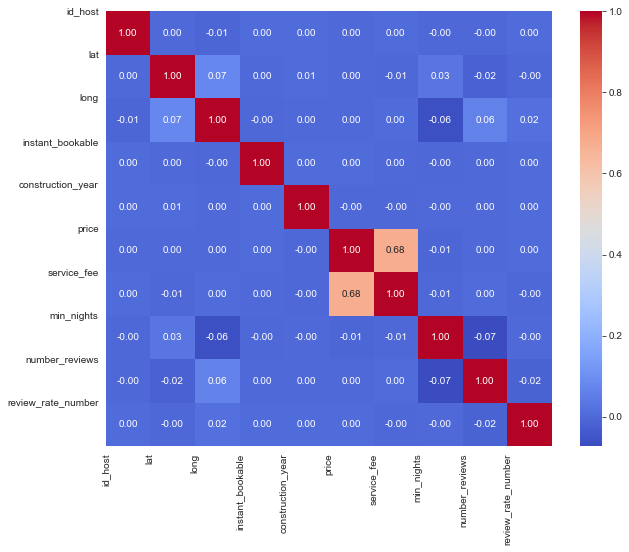

In [33]:
#Comenzamos analizando la correlación de variables.
corr = df.corr()
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corr, cmap='coolwarm', annot=True, fmt=".2f")
plt.xticks(range(len(corr.columns)), corr.columns);
plt.yticks(range(len(corr.columns)), corr.columns)
plt.show()

De acuerdo al heat map, la variable que tiene una mayor correlación con el precio de alquiler de los alojamientos es el service_fee con un 68% de correlación, por tanto, es una feature que debe estar incluida en el modelo.


Text(0.5, 1.0, 'Distribución de precios')

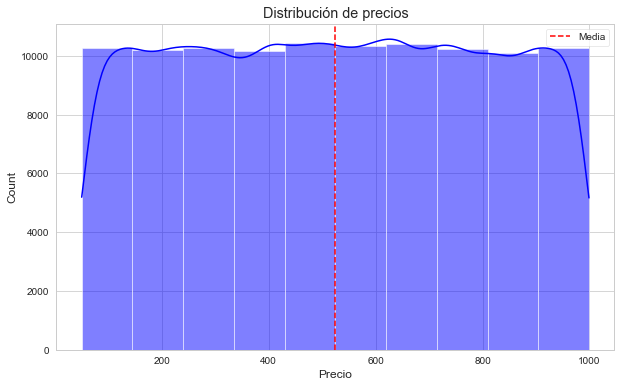

In [34]:
plt.figure(figsize=(10, 6))
sns.set_style('whitegrid')
sns.histplot(df['price'], kde=True, color='blue', alpha=0.5, bins=10)
plt.axvline(df['price'].mean(), color='red', linestyle='--', label='Media')
plt.xlabel('Precio')
plt.legend()
plt.title('Distribución de precios')

In [35]:
df['room_type'].unique()

array(['Private room', 'Entire home/apt', 'Shared room', 'Hotel room'],
      dtype=object)

Text(0, 0.5, 'Precio')

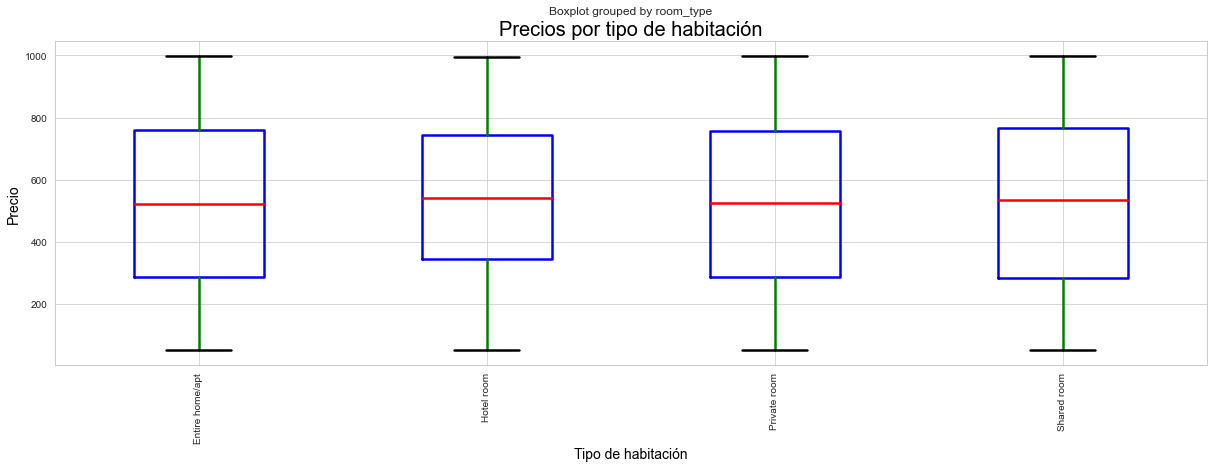

In [36]:
boxplot = df.boxplot(column='price', by ='room_type', figsize =(20,6), rot=90, 
                     boxprops=dict(linewidth=2.5, color='blue'),
                     whiskerprops=dict(linewidth=2.5, color='green'),
                     capprops=dict(linewidth=2.5, color='black'),
                     medianprops=dict(linewidth=2.5, color='red'))

plt.title('Precios por tipo de habitación', fontsize=20, color='black')
plt.xlabel('Tipo de habitación', fontsize=14, color='black')
plt.ylabel('Precio', fontsize=14, color='black')




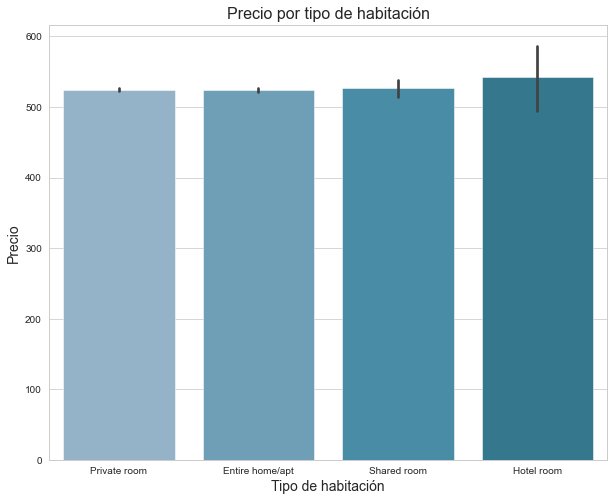

In [37]:
plt.figure(figsize=(10, 8))

sns.set_palette('PuBuGn_d')

sns.barplot(x='room_type', y='price', data=df)

plt.title('Precio por tipo de habitación', fontsize=16)
plt.xlabel('Tipo de habitación', fontsize=14)
plt.ylabel('Precio', fontsize=14)

plt.show()

Insight: Los precios de habitaciones de hotel son un poco más altos en relación a los otros tipos de alojamiento (habitación privada, alojamiento entero, habitación compartida).

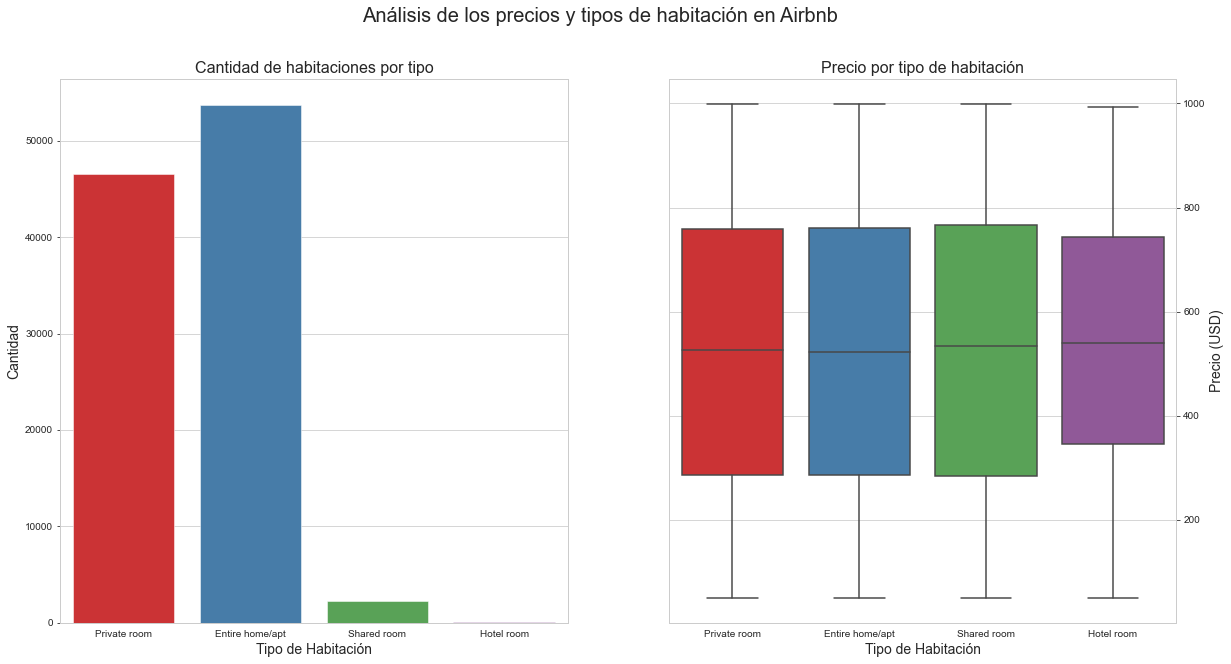

In [38]:
room_type_list = Counter(df['room_type'])
labels = room_type_list.keys()
sizes = room_type_list.values()

f, axes = plt.subplots(1,2,figsize=(20,10))

sns.countplot(df['room_type'], ax = axes[0], palette="Set1")
axes[0].set_xlabel('Tipo de Habitación', fontsize=14)
axes[0].set_ylabel('Cantidad', fontsize=14)
axes[0].yaxis.tick_left()
axes[0].set_title('Cantidad de habitaciones por tipo', fontsize=16)

sns.boxplot(x = 'room_type', y = 'price', data = df, ax = axes[1], palette="Set1")
axes[1].set_xlabel('Tipo de Habitación', fontsize=14)
axes[1].set_ylabel('Precio (USD)', fontsize=14)
axes[1].yaxis.set_label_position("right")
axes[1].yaxis.tick_right()
axes[1].set_title('Precio por tipo de habitación', fontsize=16)

plt.suptitle('Análisis de los precios y tipos de habitación en Airbnb', fontsize=20)
plt.show()

<AxesSubplot:xlabel='long', ylabel='lat'>

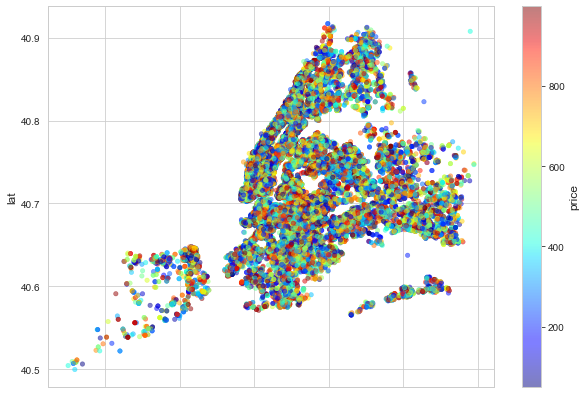

In [39]:
df.plot(kind='scatter', x='long', y='lat', alpha=0.5, figsize=(10,7),
        c='price',  cmap= plt.get_cmap('jet'), colorbar=True)

In [40]:
!pip install folium -q
import folium

In [41]:
mapa=folium.Map(location=[40.7142700, -74.0059700], zoom_start=10)
mapa

In [42]:
district=df[['lat', 'long']].to_numpy()
district

array([[ 40.64749, -73.97237],
       [ 40.75362, -73.98377],
       [ 40.80902, -73.9419 ],
       ...,
       [ 40.67505, -73.98045],
       [ 40.74989, -73.93777],
       [ 40.76807, -73.98342]])

In [43]:
from folium import plugins
from folium.plugins import HeatMap
HeatMap(district, radius=15, max_val=0.1 , min_opacity=0.4).add_to(mapa)
mapa

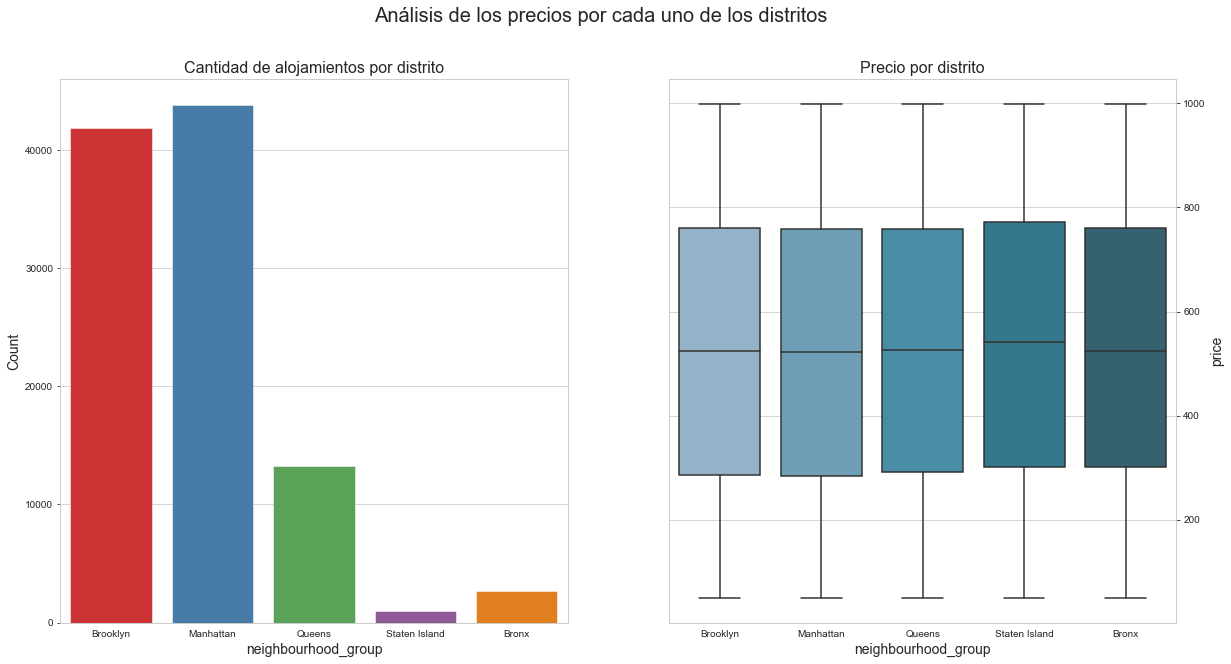

In [44]:
neighbourhood_group_list = Counter(df['neighbourhood_group'])
labels = neighbourhood_group_list.keys()
sizes = neighbourhood_group_list.values()

f, axes = plt.subplots(1,2,figsize=(20,10))

sns.countplot(df['neighbourhood_group'], ax = axes[0], palette="Set1")
axes[0].set_xlabel('neighbourhood_group', fontsize=14)
axes[0].set_ylabel('Count', fontsize=14)
axes[0].yaxis.tick_left()
axes[0].set_title('Cantidad de alojamientos por distrito', fontsize=16)

sns.boxplot(x = 'neighbourhood_group', y = 'price', data = df, ax = axes[1])
axes[1].set_xlabel('neighbourhood_group', fontsize=14)
axes[1].set_ylabel('price', fontsize=14)
axes[1].yaxis.set_label_position("right")
axes[1].yaxis.tick_right()
axes[1].set_title('Precio por distrito', fontsize=16)



plt.suptitle('Análisis de los precios por cada uno de los distritos', fontsize=20)
plt.show()
plt.show()

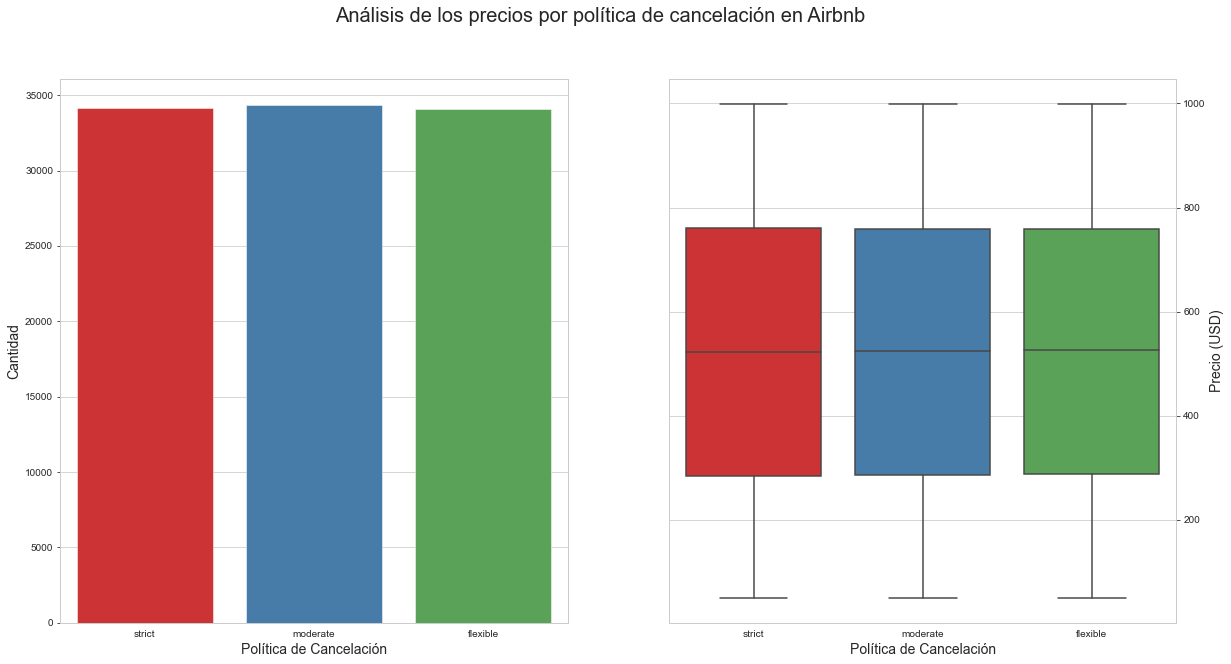

In [45]:
room_type_list = Counter(df['cancellation_policy'])
labels = room_type_list.keys()
sizes = room_type_list.values()

f, axes = plt.subplots(1,2,figsize=(20,10))

sns.countplot(df['cancellation_policy'], ax = axes[0], palette="Set1")
axes[0].set_xlabel('Política de Cancelación', fontsize=14)
axes[0].set_ylabel('Cantidad', fontsize=14)
axes[0].yaxis.tick_left()

sns.boxplot(x = 'cancellation_policy', y = 'price', data = df, ax = axes[1], palette="Set1")
axes[1].set_xlabel('Política de Cancelación', fontsize=14)
axes[1].set_ylabel('Precio (USD)', fontsize=14)
axes[1].yaxis.set_label_position("right")
axes[1].yaxis.tick_right()

plt.suptitle('Análisis de los precios por política de cancelación en Airbnb', fontsize=20)
plt.show()

Text(0.5, 0, 'Número de reviews')

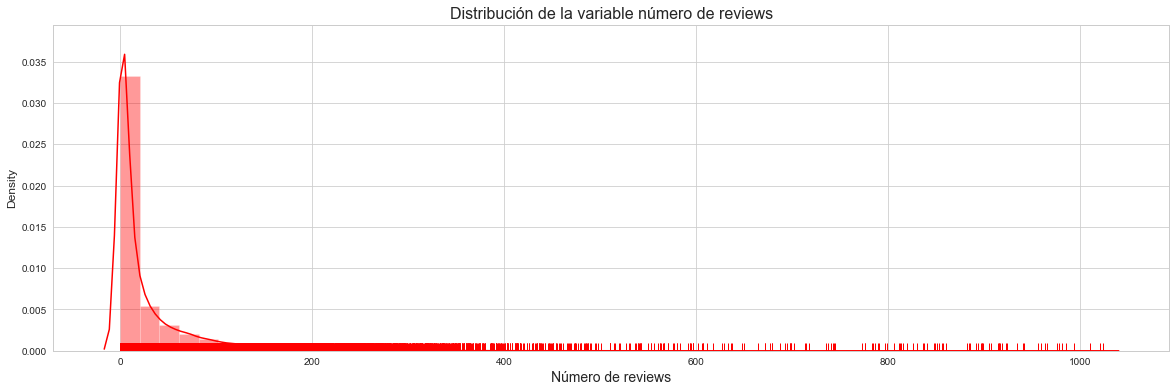

In [46]:
plt.figure(figsize=(20,6))
sns.distplot(df['number_reviews'], rug= True, color='red')
plt.title('Distribución de la variable número de reviews', fontsize=16)
plt.xlabel('Número de reviews', fontsize=14)

Text(0.5, 0, 'Número de reviews')

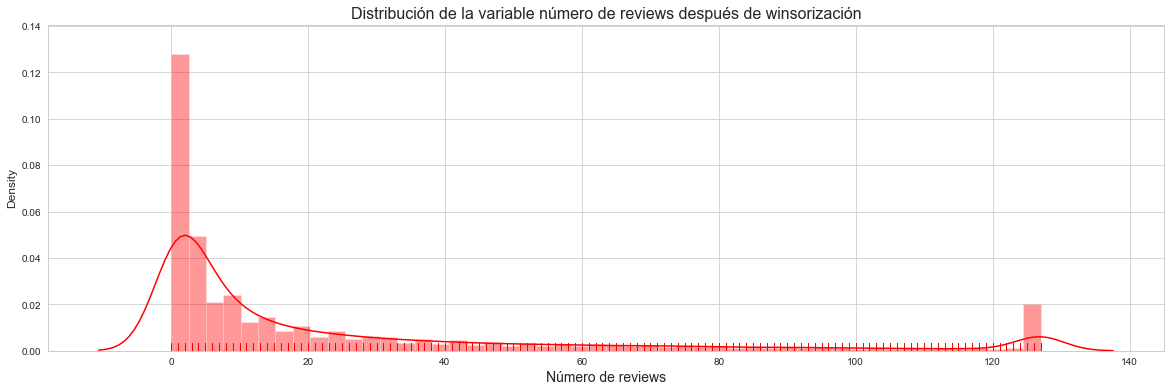

In [47]:
# Winsorización de la variable "number_reviews"
from scipy.stats.mstats import winsorize
wins_number_reviews = winsorize(df['number_reviews'], limits=[0.05, 0.05])

# Graficamos el histograma
plt.figure(figsize=(20,6))
sns.distplot(wins_number_reviews, rug=True, color='red')
plt.title('Distribución de la variable número de reviews después de winsorización', fontsize=16)
plt.xlabel('Número de reviews', fontsize=14)

Text(0.5, 0, 'Mínimo de noches')

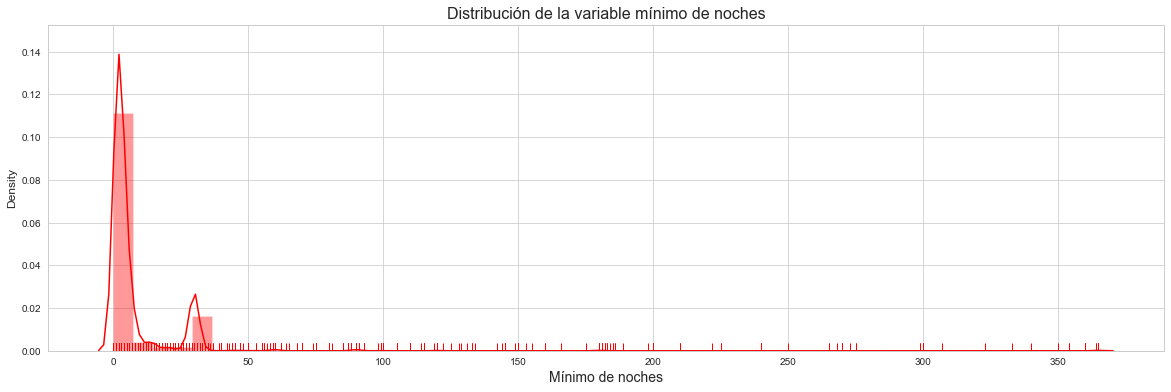

In [48]:
plt.figure(figsize=(20,6))
sns.distplot(df['min_nights'], rug= True, color='red')
plt.title('Distribución de la variable mínimo de noches', fontsize=16)
plt.xlabel('Mínimo de noches', fontsize=14)

Text(0.5, 0, 'Mínimo de noches')

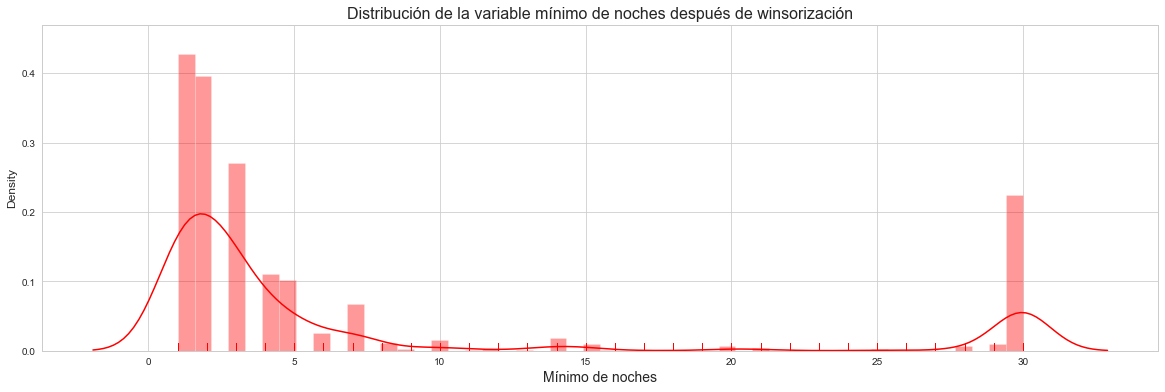

In [49]:
# Winsorización de la variable "number_reviews"
from scipy.stats.mstats import winsorize
wins_min_nights = winsorize(df['min_nights'],limits=[0.05, 0.05])

# Graficamos el histograma
plt.figure(figsize=(20,6))
sns.distplot(wins_min_nights, rug=True, color='red')
plt.title('Distribución de la variable mínimo de noches después de winsorización', fontsize=16)
plt.xlabel('Mínimo de noches', fontsize=14)

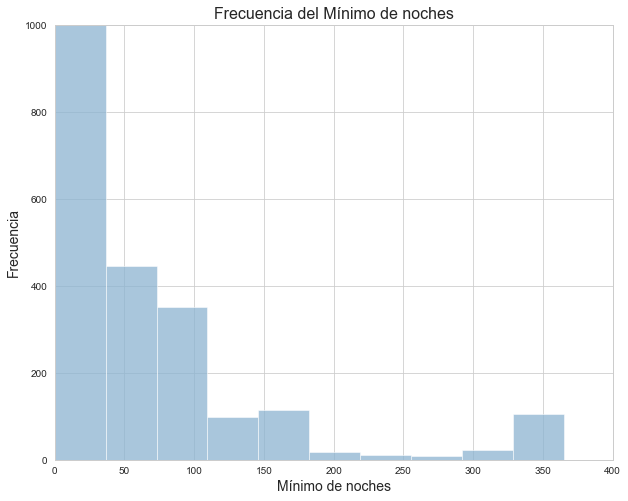

In [50]:
plt.figure(figsize=(10, 8))
sns.set_palette('PuBuGn_d')

# Crear histograma con barras por rango de precios
sns.histplot(data=df, x='min_nights', bins=10)

plt.title('Frecuencia del Mínimo de noches', fontsize=16)
plt.xlabel('Mínimo de noches', fontsize=14)
plt.ylabel('Frecuencia', fontsize=14)
plt.ylim(0, 1000)
plt.xlim(0, 400)

plt.show()

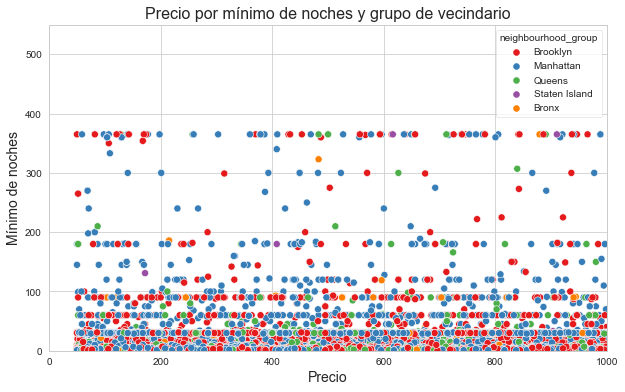

In [51]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='price', y='min_nights', data=df, hue='neighbourhood_group', palette='Set1', s=50)
plt.title('Precio por mínimo de noches y grupo de vecindario', fontsize=16)
plt.xlabel('Precio', fontsize=14)
plt.ylabel('Mínimo de noches', fontsize=14)
plt.ylim(0, 550)
plt.xlim(0, 1000)
plt.show()

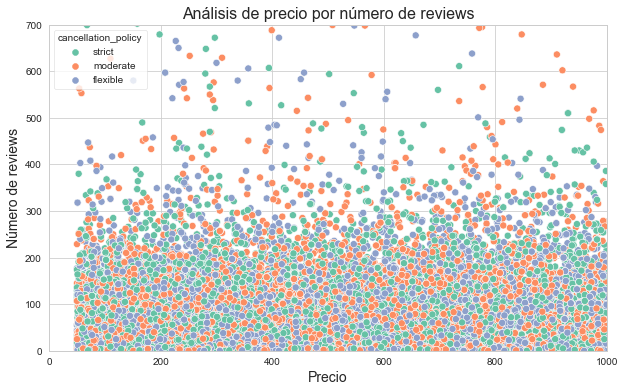

In [52]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='price', y='number_reviews', data=df, hue='cancellation_policy', palette='Set2', s=50)
plt.title('Análisis de precio por número de reviews', fontsize=16)
plt.xlabel('Precio', fontsize=14)
plt.ylabel('Número de reviews', fontsize=14)
plt.ylim(0, 700)
plt.xlim(0, 1000)
plt.show()

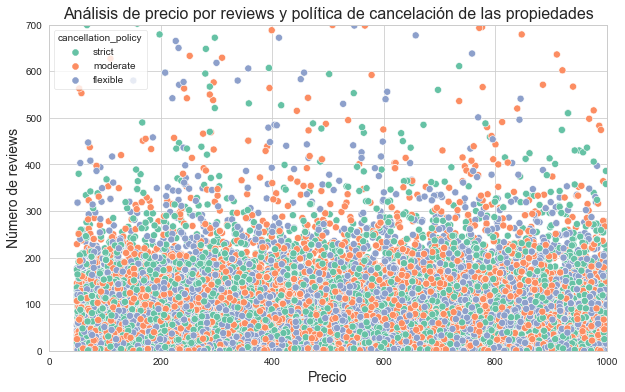

In [53]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='price', y='number_reviews', data=df, hue='cancellation_policy', palette='Set2', s=50)
plt.title('Análisis de precio por reviews y política de cancelación de las propiedades', fontsize=16)
plt.xlabel('Precio', fontsize=14)
plt.ylabel('Número de reviews', fontsize=14)
plt.ylim(0, 700)
plt.xlim(0, 1000)
plt.show()

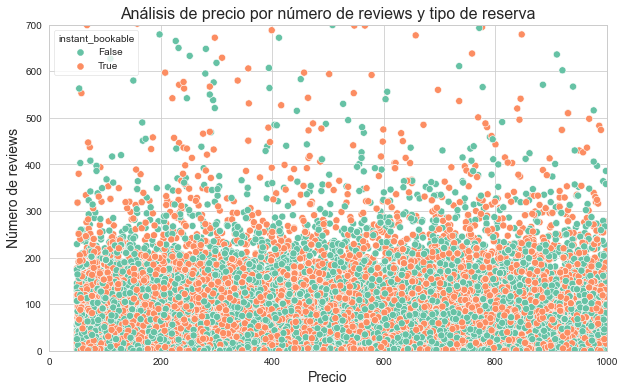

In [54]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='price', y='number_reviews', data=df, hue='instant_bookable', palette='Set2', s=50)
plt.title('Análisis de precio por número de reviews y tipo de reserva', fontsize=16)
plt.xlabel('Precio', fontsize=14)
plt.ylabel('Número de reviews', fontsize=14)
plt.ylim(0, 700)
plt.xlim(0, 1000)
plt.show()

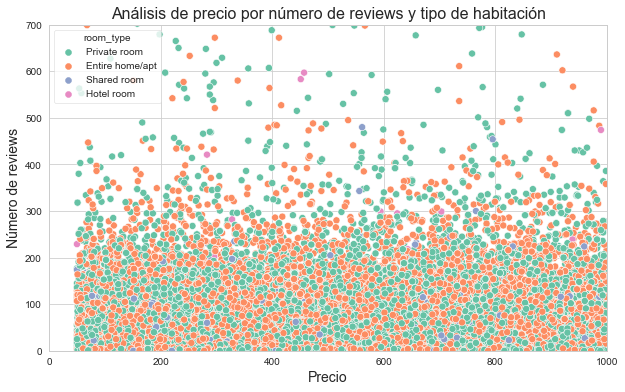

In [55]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='price', y='number_reviews', data=df, hue='room_type', palette='Set2', s=50)
plt.title('Análisis de precio por número de reviews y tipo de habitación', fontsize=16)
plt.xlabel('Precio', fontsize=14)
plt.ylabel('Número de reviews', fontsize=14)
plt.ylim(0, 700)
plt.xlim(0, 1000)
plt.show()


Insights: 
Se tienen más alojamientos cuyas valoraciones oscilan en un rango de 0 a 200 en total, como se pudo observar también en gráficos anteriores, encontrando que hay menor oferta de alojamientos con valoraciones mayores a este número. También se observa que la feature "número de reviews", no tiene influencia en el precio del alquiler.

Así mismo, de acuerdo a los gráficos anteriores, no se presenta una tendencia (ni positiva ni negativa), tampoco se observa una correlación entre sus variables. 

Text(0.5, 1.0, 'Distribución de alojamientos por año de construcción')

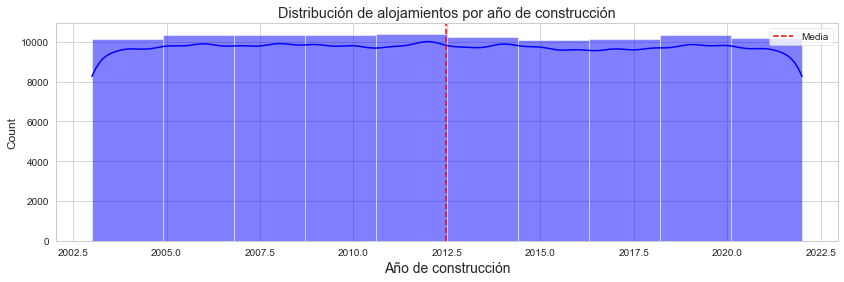

In [56]:
f, axes = plt.subplots(figsize=(14,4))

sns.set_style('whitegrid')
sns.histplot(df['construction_year'], kde=True, color='blue', bins=10)
plt.axvline(df['construction_year'].mean(), color='red', linestyle='--', label='Media')
axes.set_xlabel('Año de construcción', fontsize=14)
plt.legend()
plt.title('Distribución de alojamientos por año de construcción')

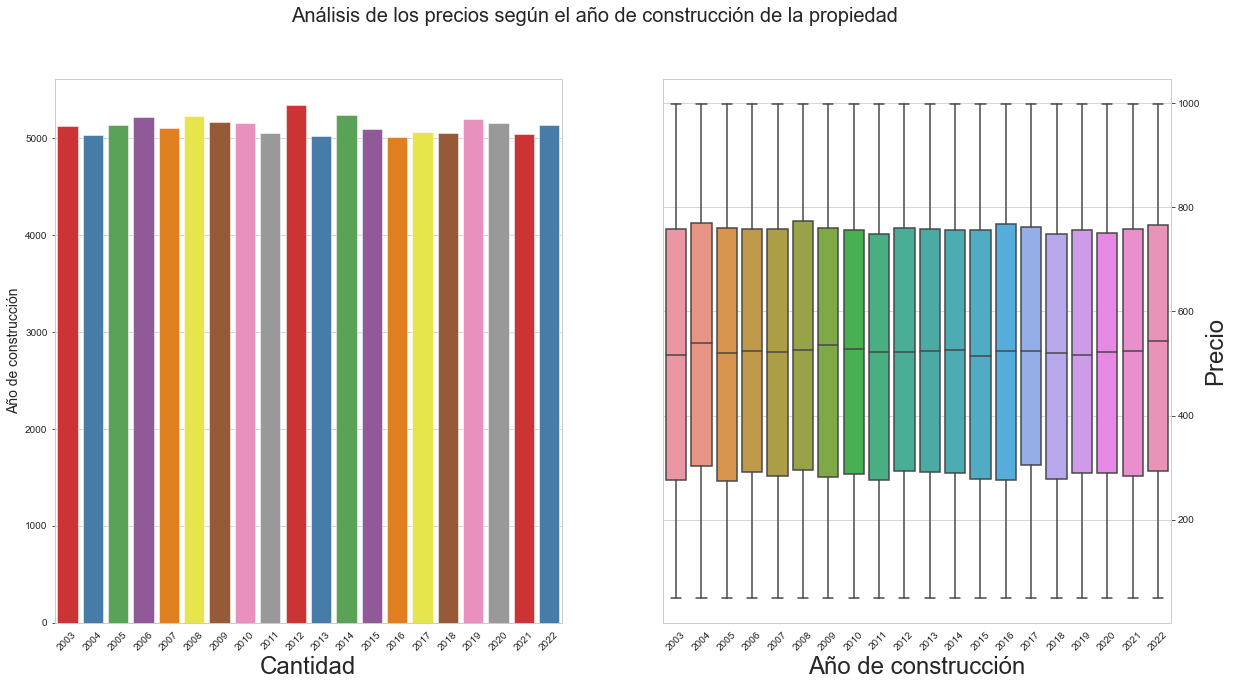

In [57]:
construction_year_list = Counter(df['construction_year'])
labels = construction_year_list.keys()
sizes = construction_year_list.values()

f, axes = plt.subplots(1,2,figsize=(20,10))

sns.countplot(df['construction_year'], ax = axes[0], palette="Set1")
axes[0].set_xlabel('Cantidad', fontsize=24)
axes[0].set_ylabel('Año de construcción', fontsize=14)
axes[0].yaxis.tick_left()
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45)

sns.boxplot(x = 'construction_year', y = 'price', data = df, ax = axes[1])
axes[1].set_xlabel('Año de construcción', fontsize=24)
axes[1].set_ylabel('Precio', fontsize=24)
axes[1].yaxis.set_label_position("right")
axes[1].yaxis.tick_right()
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45)

plt.suptitle('Análisis de los precios según el año de construcción de la propiedad', fontsize=20)
plt.show()

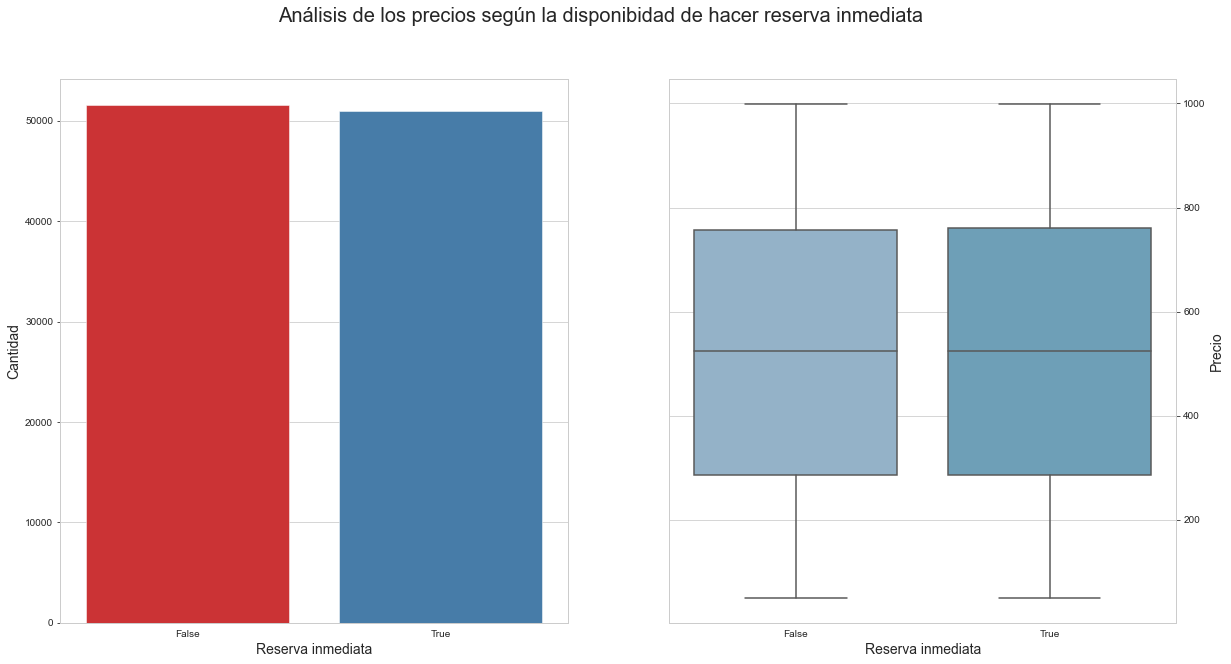

In [58]:
instant_bookable_list = Counter(df['instant_bookable'])
labels = instant_bookable_list.keys()
sizes = instant_bookable_list.values()

f, axes = plt.subplots(1,2,figsize=(20,10))

sns.countplot(df['instant_bookable'], ax = axes[0], palette="Set1")
axes[0].set_xlabel('Reserva inmediata', fontsize=14)
axes[0].set_ylabel('Cantidad', fontsize=14)
axes[0].yaxis.tick_left()

sns.boxplot(x = 'instant_bookable', y = 'price', data = df, ax = axes[1])
axes[1].set_xlabel('Reserva inmediata', fontsize=14)
axes[1].set_ylabel('Precio', fontsize=14)
axes[1].yaxis.set_label_position("right")
axes[1].yaxis.tick_right()

plt.suptitle('Análisis de los precios según la disponibidad de hacer reserva inmediata', fontsize=20)
plt.show()

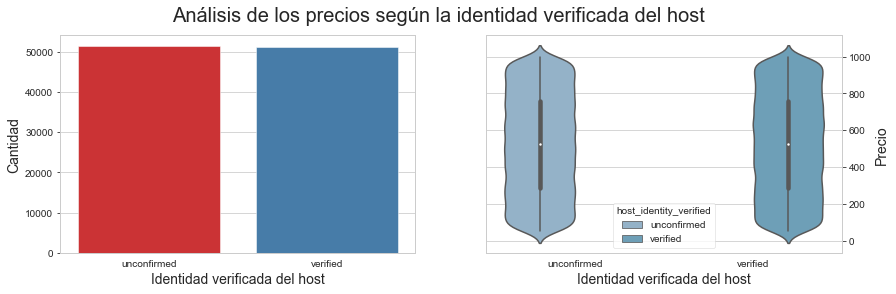

In [59]:
host_identity_list = Counter(df['host_identity_verified'])
labels = host_identity_list.keys()
sizes = host_identity_list.values()

f, axes = plt.subplots(1,2,figsize=(14,4))

sns.countplot(df['host_identity_verified'], ax = axes[0], palette="Set1")
axes[0].set_xlabel('Identidad verificada del host', fontsize=14)
axes[0].set_ylabel('Cantidad', fontsize=14)
axes[0].yaxis.tick_left()

sns.violinplot(x = 'host_identity_verified', y = 'price', data = df, hue = 'host_identity_verified', ax = axes[1])
axes[1].set_xlabel('Identidad verificada del host', fontsize=14)
axes[1].set_ylabel('Precio', fontsize=14)
axes[1].yaxis.set_label_position("right")
axes[1].yaxis.tick_right()
plt.suptitle('Análisis de los precios según la identidad verificada del host', fontsize=20)
plt.show()

In [60]:
host_identity_verified_list = Counter(df['host_identity_verified'])
labels = host_identity_verified_list.keys()
sizes = host_identity_verified_list.values()

f, axes = plt.subplots(1,2,figsize=(20,10))

sns.countplot(df['host_identity_verified'], ax = axes[0], palette="Set1")
axes[0].set_xlabel('Identidad verificada del host', fontsize=14)
axes[0].set_ylabel('Cantidad', fontsize=14)
axes[0].yaxis.tick_left()

sns.boxplot(x = 'host_identity_verified', y = 'price', data = df, ax = axes[1])
axes[1].set_xlabel('Identidad verificada del host', fontsize=14)
axes[1].set_ylabel('Precio', fontsize=14)
axes[1].yaxis.set_label_position("right")
axes[1].yaxis.tick_right()
plt.suptitle('Análisis de los precios según la identidad verificada del host', fontsize=20)
plt.show()

De acuerdo a nuestro Análisis Exploratorio de Datos, se puede concluir que de acuerdo a las gráficas, la variable que tiene incidencia en el precio es el tipo de habitación y en menor medida el distrito, razón por la cual, se procede a convertir las variables categóricas en variables de tipo cuantitativo para poderlas incluir en nuestro modelo.

## Ingeniería de Atributos
### Transformación ordinal,  de las variables categóricas (neighbourhood_group y room_type).

In [61]:
from sklearn.preprocessing import OrdinalEncoder
O_codificador= OrdinalEncoder()
df['neighbourhood_group_cuant']= O_codificador.fit_transform(df[['neighbourhood_group']])
O_codificador.categories_


[array(['Bronx', 'Brooklyn', 'Manhattan', 'Queens', 'Staten Island'],
       dtype=object)]

In [62]:
from sklearn.preprocessing import OrdinalEncoder
O_codificador= OrdinalEncoder()
df['room_type_cuant']=O_codificador.fit_transform(df[['room_type']])
O_codificador.categories_

[array(['Entire home/apt', 'Hotel room', 'Private room', 'Shared room'],
       dtype=object)]

In [63]:
df.head()

id_host host_identity_verified neighbourhood_group neighbourhood  \
0  80014485718            unconfirmed            Brooklyn    Kensington   
1  52335172823               verified           Manhattan       Midtown   
2  78829239556            unconfirmed           Manhattan        Harlem   
3  85098326012            unconfirmed            Brooklyn  Clinton Hill   
4  92037596077               verified           Manhattan   East Harlem   

        lat      long  instant_bookable cancellation_policy        room_type  \
0  40.64749 -73.97237             False              strict     Private room   
1  40.75362 -73.98377             False            moderate  Entire home/apt   
2  40.80902 -73.94190              True            flexible     Private room   
3  40.68514 -73.95976              True            moderate  Entire home/apt   
4  40.79851 -73.94399             False            moderate  Entire home/apt   

   construction_year  price  service_fee  min_nights  number_reviews  \
0               2020  966.0        193.0          10             9.0   
1               2007  142.0         28.0          30            45.0   
2               2005  620.0        124.0           3             0.0   
3               2005  368.0         74.0          30           270.0   
4               2009  204.0         41.0          10             9.0   

  reviews_month  review_rate_number  neighbourhood_group_cuant  \
0          0.21                 4.0                        1.0   
1          0.38                 4.0                        2.0   
2         1.374                 5.0                        2.0   
3          4.64                 4.0                        1.0   
4           0.1                 3.0                        2.0   

   room_type_cuant  
0              2.0  
1              0.0  
2              2.0  
3              0.0  
4              0.0

In [65]:
df['reviews_month'] = df['reviews_month'].apply(lambda x: float(x))

# 6. Elección del algoritmo

In [66]:
data = df.copy().drop(columns=['host_identity_verified','neighbourhood_group','neighbourhood','instant_bookable','cancellation_policy','room_type'])

In [67]:
data = data.dropna()

In [68]:
data.isnull().sum()

id_host                      0
lat                          0
long                         0
construction_year            0
price                        0
service_fee                  0
min_nights                   0
number_reviews               0
reviews_month                0
review_rate_number           0
neighbourhood_group_cuant    0
room_type_cuant              0
dtype: int64

In [69]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 12 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   id_host                    102599 non-null  int64  
 1   lat                        102599 non-null  float64
 2   long                       102599 non-null  float64
 3   construction_year          102599 non-null  int32  
 4   price                      102599 non-null  float64
 5   service_fee                102599 non-null  float64
 6   min_nights                 102599 non-null  float64
 7   number_reviews             102599 non-null  float64
 8   reviews_month              102599 non-null  float64
 9   review_rate_number         102599 non-null  float64
 10  neighbourhood_group_cuant  102599 non-null  float64
 11  room_type_cuant            102599 non-null  float64
dtypes: float64(10), int32(1), int64(1)
memory usage: 9.0 MB


In [70]:
data.head()

id_host       lat      long  construction_year  price  service_fee  \
0  80014485718  40.64749 -73.97237               2020  966.0        193.0   
1  52335172823  40.75362 -73.98377               2007  142.0         28.0   
2  78829239556  40.80902 -73.94190               2005  620.0        124.0   
3  85098326012  40.68514 -73.95976               2005  368.0         74.0   
4  92037596077  40.79851 -73.94399               2009  204.0         41.0   

   min_nights  number_reviews  reviews_month  review_rate_number  \
0        10.0             9.0          0.210                 4.0   
1        30.0            45.0          0.380                 4.0   
2         3.0             0.0          1.374                 5.0   
3        30.0           270.0          4.640                 4.0   
4        10.0             9.0          0.100                 3.0   

   neighbourhood_group_cuant  room_type_cuant  
0                        1.0              2.0  
1                        2.0              0.0  
2                        2.0              2.0  
3                        1.0              0.0  
4                        2.0              0.0

In [71]:
X = data.copy().drop('price', axis=1)
y = data['price'].copy()

In [72]:
X.shape, y.shape

((102599, 11), (102599,))

In [73]:
training_data = data.sample(frac=0.8, random_state=25)
testing_data = data.drop(training_data.index)

print(f"No. of training examples: {training_data.shape[0]}")
print(f"No. of testing examples: {testing_data.shape[0]}")


No. of training examples: 82079
No. of testing examples: 20520


In [74]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.30, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((71819, 11), (30780, 11), (71819,), (30780,))

In [75]:
print("Shape of X_train: ",X_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of y_train: ",y_train.shape)
print("Shape of y_test",y_test.shape)

Shape of X_train:  (71819, 11)
Shape of X_test:  (30780, 11)
Shape of y_train:  (71819,)
Shape of y_test (30780,)


 ## Regression Models

### Linear Regression

In [76]:
# Creating the linear regressor
model_rlinear = LinearRegression()

In [77]:
#Entrenamiento
model_rlinear.fit(X_train, y_train)
#Predicciones
pred_rlinear = model_rlinear.predict(X_test)


In [78]:
r2_score_linear_test= r2_score(y_test, pred_rlinear)
rmse_linear_test= np.sqrt(mean_squared_error(y_test, pred_rlinear))
mse_linear_test= mean_squared_error(y_test, pred_rlinear)

print('Testing R2 score:', r2_score_linear_test)
print('Testing RMSE:', rmse_linear_test)
print('Testing MSE:', mse_linear_test)


Testing R2 score: 0.46232254338817436
Testing RMSE: 200.29768611199
Testing MSE: 40119.16306181727


In [79]:
pred_rlinear_trn= model_rlinear.predict(X_train)

In [80]:
r2_score_linear_train= r2_score(y_train, pred_rlinear_trn)
rmse_linear_train= np.sqrt(mean_squared_error(y_train, pred_rlinear_trn))
mse_linear_train=  mean_squared_error(y_train, pred_rlinear_trn)

print('Training R2 score:', r2_score_linear_train)
print('Training RMSE:', rmse_linear_train)
print('Training MSE:', mse_linear_train)



Training R2 score: 0.45484568738982933
Training RMSE: 202.20342768042582
Training MSE: 40886.22616571319


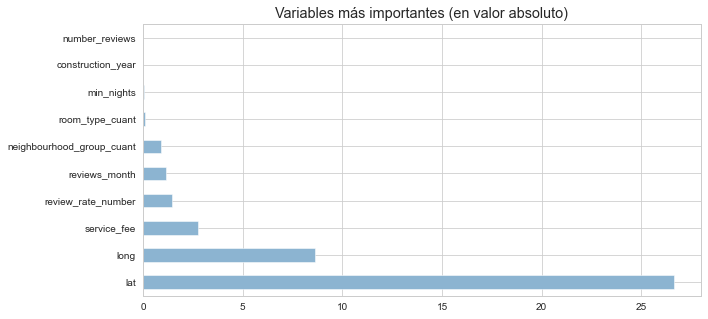

In [81]:
plt.figure(figsize=(10,5))
coeficientes = pd.Series(model_rlinear.coef_, index=X.columns)
coeficientes.abs().nlargest(10).plot(kind='barh')
plt.title('Variables más importantes (en valor absoluto)')
plt.show()

### Random Forest Regression

In [82]:
# Creating the Random Forest regressor
regressor_rf = RandomForestRegressor()

In [83]:
model_rf = RandomForestRegressor(random_state=42)
#Entrenamiento
model_rf.fit(X_train, y_train)
#Predicciones
pred_rf = model_rf.predict(X_test)

In [84]:
r2_score_rf_test= r2_score(y_test, pred_rf)
rmse_rf_test= np.sqrt(mean_squared_error(y_test, pred_rf))
mse_rf_test= mean_squared_error(y_test, pred_rf)

print('Testing R2 score:', r2_score_rf_test)
print('Testing RMSE:', rmse_rf_test)
print('Testing MSE:', mse_rf_test)

Testing R2 score: 0.8003210766018615
Testing RMSE: 122.06218263141204
Testing MSE: 14899.176428744187


In [85]:
pred_rf_trn= model_rf.predict(X_train)

In [86]:
r2_score_rf_train= r2_score(y_train, pred_rf_trn)
rmse_rf_train= np.sqrt(mean_squared_error(y_train, pred_rf_trn))
mse_rf_train=  mean_squared_error(y_train, pred_rf_trn)


print('Training R2 score:', r2_score_rf_train)
print('Training RMSE:', rmse_rf_train)
print('Training MSE:', mse_rf_train)


Training R2 score: 0.9708891165741892
Training RMSE: 46.725771394472396
Training MSE: 2183.2977124084946


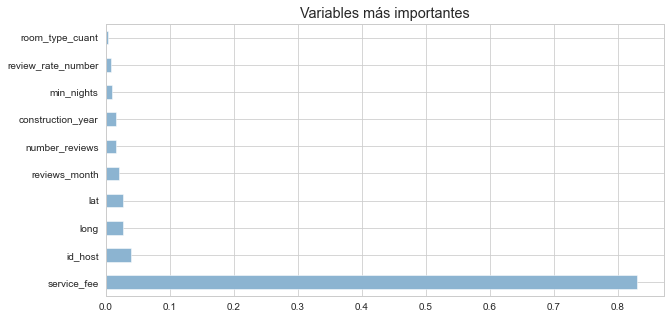

In [87]:
plt.figure(figsize=(10,5))
feat_importances_rf= pd.Series(model_rf.feature_importances_, index=X.columns)
feat_importances_rf.nlargest(10).plot(kind='barh')
plt.title('Variables más importantes');
plt.show()

### XGBoost Regressor

In [88]:
!pip install xgboost -q
from xgboost import XGBRFRegressor

In [89]:
#Creating object for XGBoost
model_xgb = XGBRFRegressor(n_estimators=10, max_depth=10)
#Entrenamiento
model_xgb.fit(X_train, y_train)
#Predicciones
pred_xgb= model_xgb.predict(X_test)

In [90]:
r2_score_xgb_test= r2_score(y_test, pred_xgb)
rmse_xgb_test= np.sqrt(mean_squared_error(y_test, pred_xgb))
mse_xgb_test= mean_squared_error(y_test, pred_xgb)

print('Testing R2 score:', r2_score_xgb_test)
print('Testing RMSE:', rmse_xgb_test)
print('Testing MSE:', mse_xgb_test)

Testing R2 score: 0.8133960843541678
Testing RMSE: 117.99820329062455
Testing MSE: 13923.575979815558


In [91]:
pred_xgb_trn= model_xgb.predict(X_train)

In [92]:
r2_score_xgb_train= r2_score(y_train, pred_xgb_trn)
rmse_xgb_train= np.sqrt(mean_squared_error(y_train, pred_xgb_trn))
mse_xgb_train= mean_squared_error(y_train, pred_xgb_trn)

print('Training R2 score:', r2_score_xgb_train)
print('Training RMSE:', rmse_xgb_train)
print('Training MSE:', mse_xgb_train)

Training R2 score: 0.8296074637614483
Training RMSE: 113.04570612194728
Training MSE: 12779.33167260967


In [93]:
plt.figure(figsize=(10,5))
feat_importances_xgb= pd.Series(model_xgb.feature_importances_, index=X.columns)
feat_importances_xgb.nlargest(10).plot(kind='barh')
plt.title('Variables más importantes');
plt.show()

### Decision Tree Regressor

In [94]:
# Creating the Decision Tree regressor
model_dt = DecisionTreeRegressor()
#Entrenamiento
model_dt.fit(X_train, y_train)
#Predicciones
pred_dt= model_dt.predict(X_test)

In [95]:
r2_score_dt_test= r2_score(y_test, pred_dt)
rmse_dt_test= np.sqrt(mean_squared_error(y_test, pred_dt))
mse_dt_test= mean_squared_error(y_test, pred_dt)

print('Testing R2 score:', r2_score_dt_test)
print('Testing RMSE:', rmse_dt_test)
print('Testing MSE:', mse_dt_test)

Testing R2 score: 0.6212683184849429
Testing RMSE: 168.10507945565305
Testing MSE: 28259.317738791422


In [96]:
pred_dt_trn= model_dt.predict(X_train)

In [97]:
r2_score_dt_train= r2_score(y_train, pred_dt_trn)
rmse_dt_train= np.sqrt(mean_squared_error(y_train, pred_dt_trn))
mse_dt_train= mean_squared_error(y_train, pred_dt_trn)

print('Training R2 score:', r2_score_dt_train)
print('Training RMSE:', rmse_dt_train)
print('Training MSE:', mse_dt_train)

Training R2 score: 0.9990585720452461
Training RMSE: 8.40276721610269
Training MSE: 70.60649688801014


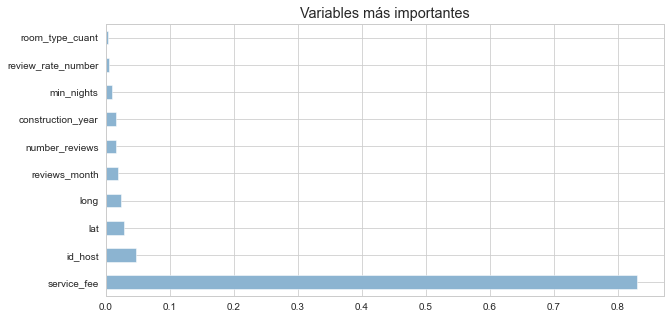

In [98]:
plt.figure(figsize=(10,5))
feat_importances_dt= pd.Series(model_dt.feature_importances_, index=X.columns)
feat_importances_dt.nlargest(10).plot(kind='barh')
plt.title('Variables más importantes');
plt.show()

### Ridge Regression

In [99]:
steps = [
    ('scalar', StandardScaler()),
    ('poly', PolynomialFeatures(degree=2)),
    ('model', Ridge())
]

ridge_pipe = Pipeline(steps)

In [100]:
# Applying Grid Search to find the best model and the best parameters
# step 1: alpha:[200, 230, 250,265, 270, 275, 290, 300, 500] -> 200
# step 2: alpha:[10,50,100,150,200] -> 50
# step 3: alpha: np.arange(10, 46, 1) -> 45

parameters =  {  'model__alpha' : [45],
                 'model__fit_intercept' : [True],
                 'model__tol' : [0.0001],
                 'model__solver' : ['auto'],
                'model__random_state': [42] 
}

In [101]:
# Creating the Decision Tree regressor
model_ridge = GridSearchCV(ridge_pipe, parameters, cv=10)
#Entrenamiento
model_ridge.fit(X_train, y_train)
#Predicciones
pred_ridge= model_ridge.predict(X_test)

In [102]:
print(model_ridge.best_score_)
print(model_ridge.best_params_)

0.6657520729499585
{'model__alpha': 45, 'model__fit_intercept': True, 'model__random_state': 42, 'model__solver': 'auto', 'model__tol': 0.0001}


In [103]:
r2_score_ridge_test= r2_score(y_test, pred_ridge)
rmse_ridge_test= np.sqrt(mean_squared_error(y_test, pred_ridge))
mse_ridge_test= mean_squared_error(y_test, pred_ridge)

print('Testing R2 score:', r2_score_ridge_test)
print('Testing RMSE:', rmse_ridge_test)
print('Testing MSE:', mse_ridge_test)

Testing R2 score: 0.6715505809957839
Testing RMSE: 156.54862851270903
Testing MSE: 24507.473089210176


In [104]:
pred_ridge_trn= model_ridge.predict(X_train)

In [105]:
r2_score_ridge_train= r2_score(y_train, pred_ridge_trn)
rmse_ridge_train= np.sqrt(mean_squared_error(y_train, pred_ridge_trn))
mse_ridge_train= mean_squared_error(y_train, pred_ridge_trn)

print('Training R2 score:', r2_score_ridge_train)
print('Training RMSE:', rmse_ridge_train)
print('Training MSE:', mse_ridge_train)

Training R2 score: 0.666606638307418
Training RMSE: 158.1274477917327
Training MSE: 25004.289745127146


### Lasso Regression

In [106]:
steps = [
    ('scalar', StandardScaler()),
    ('poly', PolynomialFeatures(degree=2)),
    ('model', Lasso())
]

lasso_pipe = Pipeline(steps)

In [107]:
# Applying Grid Search to find the best model and the best parameters
# step 1: alpha:np.arange(0.01, 1, 0.005) -> 0.9749

parameters =  {  'model__alpha' : [0.9749],
                 'model__fit_intercept' : [True],
                 'model__tol' : [0.0001],
                 'model__max_iter' : [5000],
                'model__random_state': [42] 
}
#regressor_lasso = GridSearchCV(lasso_pipe, parameters, cv=10, n_jobs = -1, verbose = 4)
#regressor_lasso = regressor_lasso.fit(X, y.ravel())

In [108]:
# Creating the Decision Tree regressor
model_lasso = GridSearchCV(lasso_pipe, parameters, cv=10, n_jobs = -1, verbose = 4)
#Entrenamiento
model_lasso.fit(X_train, y_train)
#Predicciones
pred_lasso= model_lasso.predict(X_test)

Fitting 10 folds for each of 1 candidates, totalling 10 fits


In [109]:
print(model_lasso.best_score_)
print(model_lasso.best_params_)

0.6660784780799338
{'model__alpha': 0.9749, 'model__fit_intercept': True, 'model__max_iter': 5000, 'model__random_state': 42, 'model__tol': 0.0001}


In [110]:
r2_score_lasso_test= r2_score(y_test, pred_lasso)
rmse_lasso_test= np.sqrt(mean_squared_error(y_test, pred_lasso))
mse_lasso_test= mean_squared_error(y_test, pred_lasso)

print('Testing R2 score:', r2_score_lasso_test)
print('Testing RMSE:', rmse_lasso_test)
print('Testing MSE:', mse_lasso_test)

Testing R2 score: 0.6717165463961963
Testing RMSE: 156.5090715257394
Testing MSE: 24495.089469849005


In [111]:
pred_lasso_trn= model_lasso.predict(X_train)

In [112]:
r2_score_lasso_train= r2_score(y_train, pred_lasso_trn)
rmse_lasso_train= np.sqrt(mean_squared_error(y_train, pred_lasso_trn))
mse_lasso_train= mean_squared_error(y_train, pred_lasso_trn)

print('Training R2 score:', r2_score_lasso_train)
print('Training RMSE:', rmse_lasso_train)
print('Training MSE:', mse_lasso_train)

Training R2 score: 0.6662836220234711
Training RMSE: 158.204032061929
Training MSE: 25028.515760651866


# 7. Validación del modelo.

In [113]:
models = [('Linear Regression', rmse_linear_train, rmse_linear_test, r2_score_linear_train, r2_score_linear_test, mse_linear_train, mse_linear_test),
         ('Random Forest Regression', rmse_rf_train,rmse_rf_test, r2_score_rf_train, r2_score_rf_test, mse_rf_train, mse_rf_test),
          ('XGBoost Regression', rmse_xgb_train, rmse_xgb_test, r2_score_xgb_train, r2_score_xgb_test, mse_xgb_train, mse_xgb_test),
          ('Decision Tree Regression', rmse_dt_train, rmse_dt_test, r2_score_dt_train, r2_score_dt_test, mse_dt_train, mse_dt_test),       
          ('Ridge Regression', rmse_ridge_train,rmse_ridge_test, r2_score_ridge_train, r2_score_ridge_test, mse_ridge_train, mse_ridge_test), 
          ('Lasso Regression', rmse_lasso_train, rmse_lasso_test, r2_score_lasso_train, r2_score_lasso_test, mse_lasso_train, mse_lasso_test)        
         ]


In [121]:
predict = pd.DataFrame(data = models, columns=['Model', 'RMSE(training)', 'RMSE(test)','R2_Score(training)', 'R2_Score(test)','MSE(training)', 'MSE(test)'])
predict

Model  RMSE(training)  RMSE(test)  R2_Score(training)  \
0         Linear Regression      202.203428  200.297686            0.454846   
1  Random Forest Regression       46.725771  122.062183            0.970889   
2        XGBoost Regression      113.045706  117.998203            0.829607   
3  Decision Tree Regression        8.402767  168.105079            0.999059   
4          Ridge Regression      158.127448  156.548629            0.666607   
5          Lasso Regression      158.204032  156.509072            0.666284   

   R2_Score(test)  MSE(training)     MSE(test)  
0        0.462323   40886.226166  40119.163062  
1        0.800321    2183.297712  14899.176429  
2        0.813396   12779.331673  13923.575980  
3        0.621268      70.606497  28259.317739  
4        0.671551   25004.289745  24507.473089  
5        0.671717   25028.515761  24495.089470

 ### Visualización del Rendimiento de los modelos.

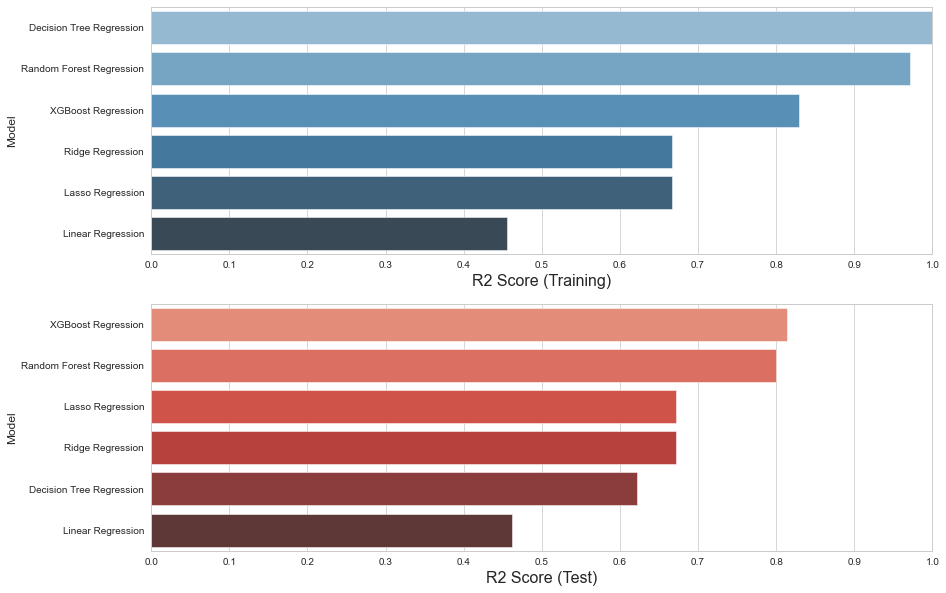

In [123]:
f, axes = plt.subplots(2,1, figsize=(14,10))

predict.sort_values(by=['R2_Score(training)'], ascending=False, inplace=True)

sns.barplot(x='R2_Score(training)', y='Model', data = predict, palette='Blues_d', ax = axes[0])
#axes[0].set(xlabel='Region', ylabel='Charges')
axes[0].set_xlabel('R2 Score (Training)', size=16)
axes[0].set_ylabel('Model')
axes[0].set_xlim(0,1.0)
axes[0].set_xticks(np.arange(0, 1.1, 0.1))

predict.sort_values(by=['R2_Score(test)'], ascending=False, inplace=True)

sns.barplot(x='R2_Score(test)', y='Model', data = predict, palette='Reds_d', ax = axes[1])
#axes[0].set(xlabel='Region', ylabel='Charges')
axes[1].set_xlabel('R2 Score (Test)', size=16)
axes[1].set_ylabel('Model')
axes[1].set_xlim(0,1.0)
axes[1].set_xticks(np.arange(0, 1.1, 0.1))

plt.show()

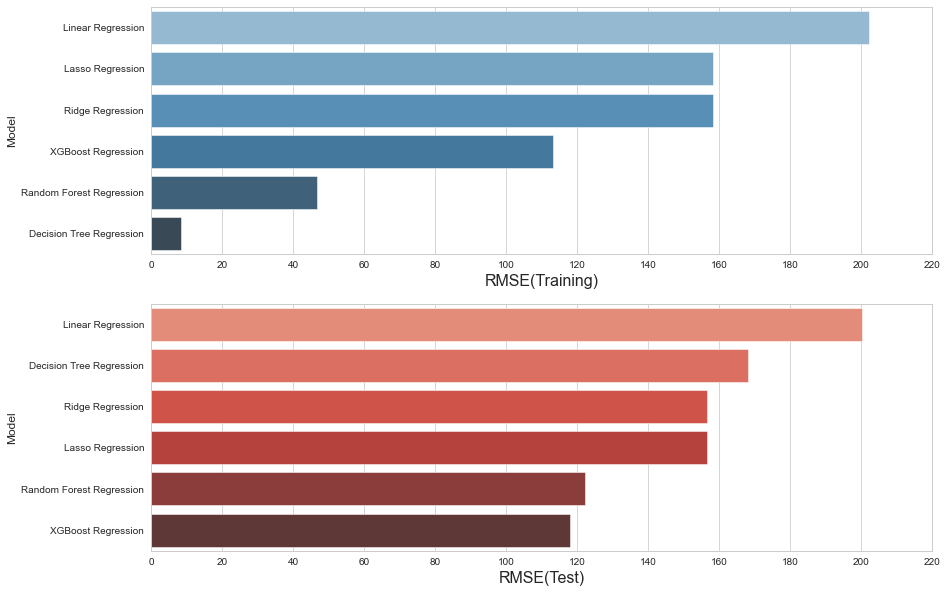

In [124]:
f, axes = plt.subplots(2,1, figsize=(14,10))

predict.sort_values(by=['RMSE(training)'], ascending=False, inplace=True)

sns.barplot(x='RMSE(training)', y='Model', data = predict, palette='Blues_d', ax = axes[0])
axes[0].set_xlabel('RMSE(Training)', size=16)
axes[0].set_ylabel('Model')
axes[0].set_xlim(0,1.0)
axes[0].set_xticks(np.arange(0, 240, 20))

predict.sort_values(by=['RMSE(test)'], ascending=False, inplace=True)

sns.barplot(x='RMSE(test)', y='Model', data = predict, palette='Reds_d', ax = axes[1])
axes[1].set_xlabel('RMSE(Test)', size=16)
axes[1].set_ylabel('Model')
axes[1].set_xlim(0,1.0)
axes[1].set_xticks(np.arange(0, 240, 20))

plt.show()

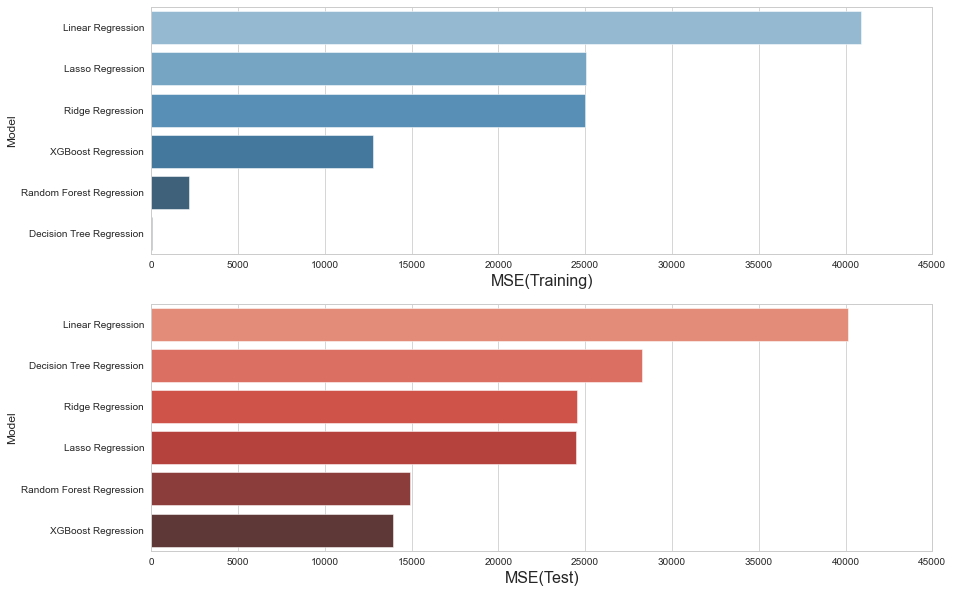

In [120]:
f, axes = plt.subplots(2,1, figsize=(14,10))

predict.sort_values(by=['MSE(training)'], ascending=False, inplace=True)

sns.barplot(x='MSE(training)', y='Model', data = predict, palette='Blues_d', ax = axes[0])
axes[0].set_xlabel('MSE(Training)', size=16)
axes[0].set_ylabel('Model')
axes[0].set_xlim(0,1.0)
axes[0].set_xticks(np.arange(0, 50000, 5000))

predict.sort_values(by=['MSE(test)'], ascending=False, inplace=True)

sns.barplot(x='MSE(test)', y='Model', data = predict, palette='Reds_d', ax = axes[1])
axes[1].set_xlabel('MSE(Test)', size=16)
axes[1].set_ylabel('Model')
axes[1].set_xlim(0,1.0)
axes[1].set_xticks(np.arange(0, 50000, 5000))

plt.show()

# 8. Conclusiones.